In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dataframe = pd.read_csv("dataset1.csv")

In [3]:
dataframe.head()

,Label,area_0,area_1,area_2,area_3,area_4
0,Parasitized,175.5,126.0,131.0,8902.5,0.0
1,Parasitized,222.0,9847.5,0.0,0.0,0.0
2,Parasitized,179.5,256.5,12413.0,0.0,0.0
3,Parasitized,18.0,187.5,9306.5,0.0,0.0
4,Parasitized,142.5,156.5,6669.5,0.0,0.0


In [4]:
dataframe.tail()

,Label,area_0,area_1,area_2,area_3,area_4
27553,Uninfected,13228.0,0.0,0.0,0.0,0.0
27554,Uninfected,9757.5,0.0,0.0,0.0,0.0
27555,Uninfected,156.0,9927.5,0.0,0.0,0.0
27556,Uninfected,13384.5,0.0,0.0,0.0,0.0
27557,Uninfected,10203.5,0.0,0.0,0.0,0.0


In [5]:
dataframe.isnull().sum()

Label     0
area_0    0
area_1    0
area_2    0
area_3    0
area_4    0
dtype: int64

In [6]:
import pixiedust

Pixiedust database opened successfully



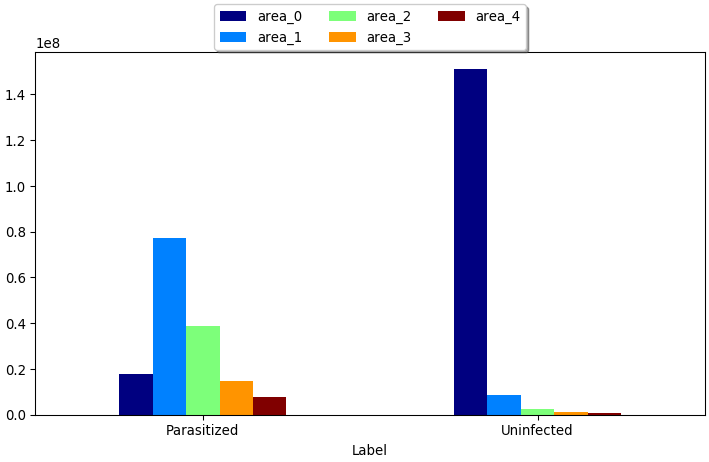

In [7]:
display(dataframe)

In [8]:
#Split into training and test data
x = dataframe.drop(["Label"],axis=1)
y = dataframe["Label"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
#APPLYING RANDOM FOREST
model_rf = RandomForestClassifier(n_estimators=100,max_depth=5)
model_rf.fit(x_train,y_train)
#joblib.dump(model,"rf_malaria_100_5")

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
predictions_rf = model_rf.predict(x_test)

print(metrics.classification_report(predictions_rf,y_test))
print(model_rf.score(x_test,y_test))

              precision    recall  f1-score   support

 Parasitized       0.90      0.90      0.90      2771
  Uninfected       0.90      0.89      0.90      2741

    accuracy                           0.90      5512
   macro avg       0.90      0.90      0.90      5512
weighted avg       0.90      0.90      0.90      5512

0.898766328011611


In [11]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, predictions_rf)
print(cm_rf)

[[2505  292]
 [ 266 2449]]


In [12]:
# Fitting Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [13]:
y_pred_dt = classifier_dt.predict(x_test)

In [14]:
print(metrics.classification_report(y_pred_dt,y_test))
print(classifier_dt.score(x_test,y_test))

              precision    recall  f1-score   support

 Parasitized       0.84      0.84      0.84      2792
  Uninfected       0.84      0.84      0.84      2720

    accuracy                           0.84      5512
   macro avg       0.84      0.84      0.84      5512
weighted avg       0.84      0.84      0.84      5512

0.8383526850507983


In [15]:
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

[[2349  448]
 [ 443 2272]]


In [16]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
# Predicting the Test set results
y_pred_nb = classifier_nb.predict(x_test)
y_pred_nb = classifier_nb.predict(x_test)

print(metrics.classification_report(y_pred_nb,y_test))
print(classifier_nb.score(x_test,y_test))



              precision    recall  f1-score   support

 Parasitized       0.81      0.92      0.86      2462
  Uninfected       0.92      0.82      0.87      3050

    accuracy                           0.86      5512
   macro avg       0.86      0.87      0.86      5512
weighted avg       0.87      0.86      0.86      5512

0.8641146589259797


In [18]:
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)

[[2255  542]
 [ 207 2508]]


In [19]:
#ANALYSIS ON RESULTS FROM DIFFERENT MODELS
X_RES=['cm_dt','cm_nb','cm_rf']